In [1]:
#1.What is the average selling price of cars for each dealer, and how does it compare across different dealers?
import pandas as pd

# Correct file path using a raw string
file_path = r"C:\Users\PC DOCTOR\data analyst assignment\BIKE DETAILS.csv"

# Read the CSV file
df = pd.read_csv(r"C:\Users\PC DOCTOR\data analyst assignment\BIKE DETAILS.csv")

# Display the first few rows
print(df.head())

# Calculate the range of selling prices
min_price = df["selling_price"].min()
max_price = df["selling_price"].max()
price_range = max_price - min_price

min_price, max_price, price_range



                                  name  selling_price  year seller_type  \
0            Royal Enfield Classic 350         175000  2019  Individual   
1                            Honda Dio          45000  2017  Individual   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                Yamaha SZ [2013-2014]          20000  2011  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN  
2  1st owner      12000           148114.0  
3  1st owner      23000            89643.0  
4  2nd owner      21000                NaN  


(5000, 760000, 755000)

In [2]:
#2.What is the median selling price for bikes in the dataset?
# Calculate the median selling price
median_price = df["selling_price"].median()
median_price

45000.0

In [3]:
#3.What is the most common seller type?
# Reload the dataset
file_path = r"C:\Users\PC DOCTOR\data analyst assignment\BIKE DETAILS.csv"
df = pd.read_csv(file_path)

# Find the most common seller type
most_common_seller = df["seller_type"].mode()[0]
most_common_seller


'Individual'

In [4]:
#4. How many bikes have driven more than 50,000 kilometers?
# Count the number of bikes that have driven more than 50,000 kilometers
bikes_above_50000_km = df[df["km_driven"] > 50000].shape[0]
bikes_above_50000_km

170

In [5]:
#5.What is the average km_driven value for each ownership type?
# Calculate the average km_driven for each ownership type
avg_km_by_owner = df.groupby("owner")["km_driven"].mean()
avg_km_by_owner

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64

In [6]:
#6.What proportion of bikes are from the year 2015 or older?
# Count total number of bikes
import pandas as pd

# Correct file path using a raw string
file_path = r"C:\Users\PC DOCTOR\data analyst assignment\BIKE DETAILS.csv"

# Read the CSV file
df = pd.read_csv(r"C:\Users\PC DOCTOR\data analyst assignment\BIKE DETAILS.csv")
total_bikes = len(df)

# Count bikes from the year 2015 or older
older_bikes = len(df[df["year"] <= 2015])

# Calculate the proportion
proportion_older_bikes = older_bikes / total_bikes

proportion_older_bikes

0.5664467483506126

In [14]:
#7.What is the trend of missing values across the dataset.

missing_values = df.isnull().sum()
missing_values

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

In [19]:
#8.What is the highest ex_showroom_price recorded, and for which bike.
# Find the highest ex_showroom_price and the corresponding bike name
max_ex_showroom_price = df["ex_showroom_price"].max()
bike_with_max_price = df[df["ex_showroom_price"] == max_ex_showroom_price]["name"].values[0]

max_ex_showroom_price, bike_with_max_price

(1278000.0, 'Harley-Davidson Street Bob')

In [22]:
#9.What is the total number of bikes listed by each seller type.
bikes_by_seller_type = df["seller_type"].value_counts()
bikes_by_seller_type

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64

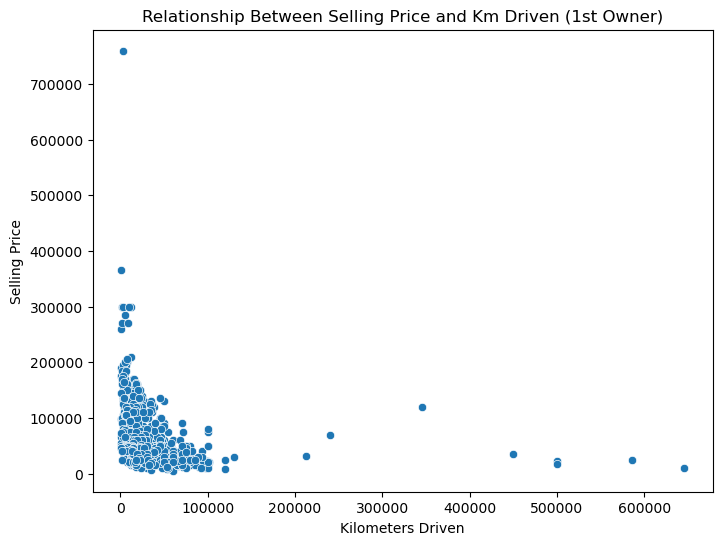

In [25]:
#10.What is the relationship between selling_price and km_driven for first-owner bikes.
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

first_owner_bikes = df[df["owner"] == "1st owner"]
plt.figure(figsize=(8, 6))
sns.scatterplot(x=first_owner_bikes["km_driven"], y=first_owner_bikes["selling_price"])
plt.xlabel("Kilometers Driven")
plt.ylabel("Selling Price")
plt.title("Relationship Between Selling Price and Km Driven (1st Owner)")
plt.show()

In [27]:
#11.Identify and remove outliers in the km_driven column using the IQR method.
Q1 = df["km_driven"].quantile(0.25)
Q3 = df["km_driven"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outliers = df[(df["km_driven"] >= lower_bound) & (df["km_driven"] <= upper_bound)]
df_no_outliers

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1054,Hero CBZ Xtreme,20000,2010,Individual,1st owner,50000,78700.0
1055,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0


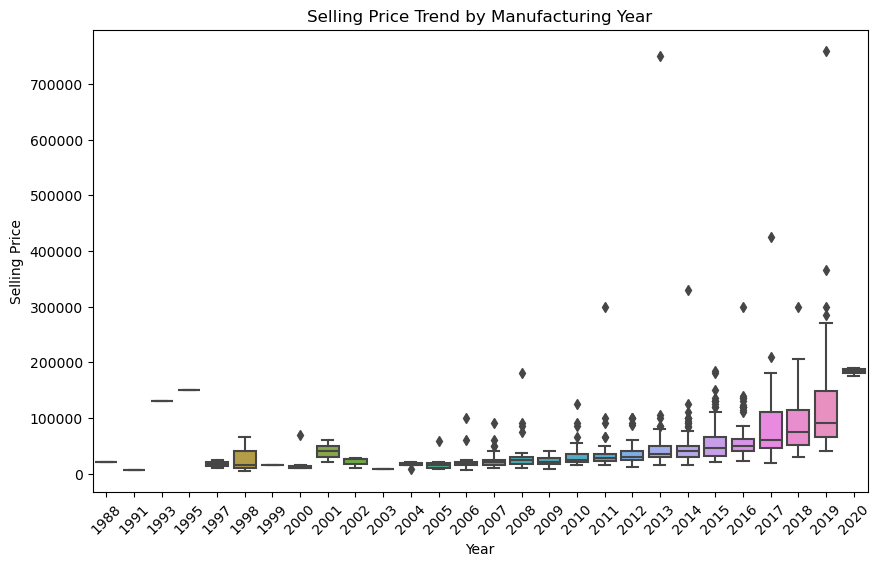

In [28]:
#12.Perform a bivariate analysis to visualize the relationship between year and selling_price.
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["year"], y=df["selling_price"])
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.title("Selling Price Trend by Manufacturing Year")
plt.show()

In [31]:
#13.What is the average depreciation in selling price based on the bike's age (current year - manufacturing
# year.
current_year = 2025  # Assuming the current year is 2025
df["bike_age"] = current_year - df["year"]
avg_depreciation = df.groupby("bike_age")["selling_price"].mean()
avg_depreciation

bike_age
5     183333.333333
6     119689.511628
7      87660.374046
8      78894.736842
9      58469.018692
10     56500.000000
11     48668.131868
12     51136.986301
13     35748.400000
14     35655.721311
15     31793.333333
16     22267.857143
17     34289.285714
18     24927.586207
19     23380.000000
20     16978.571429
21     15100.000000
22      8000.000000
23     20666.666667
24     40000.000000
25     20833.333333
26     15000.000000
27     28333.333333
28     17500.000000
30    150000.000000
32    130000.000000
34      6000.000000
37     20000.000000
Name: selling_price, dtype: float64

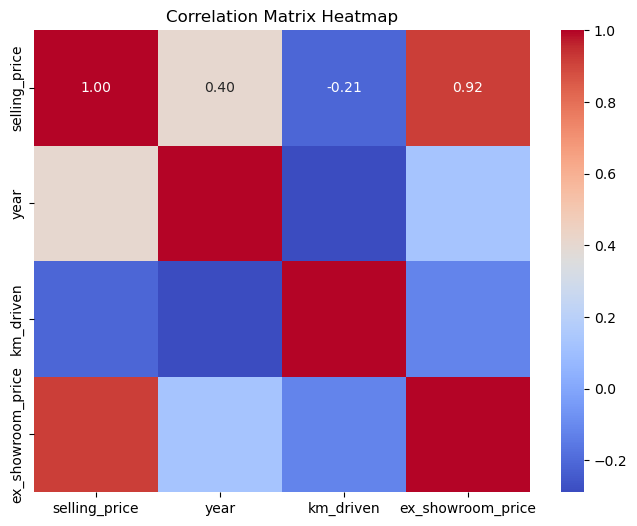

In [30]:
#14.Which bike names are priced significantly above the average price for their manufacturing year.
plt.figure(figsize=(8, 6))
corr_matrix = df[["selling_price", "year", "km_driven", "ex_showroom_price"]].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

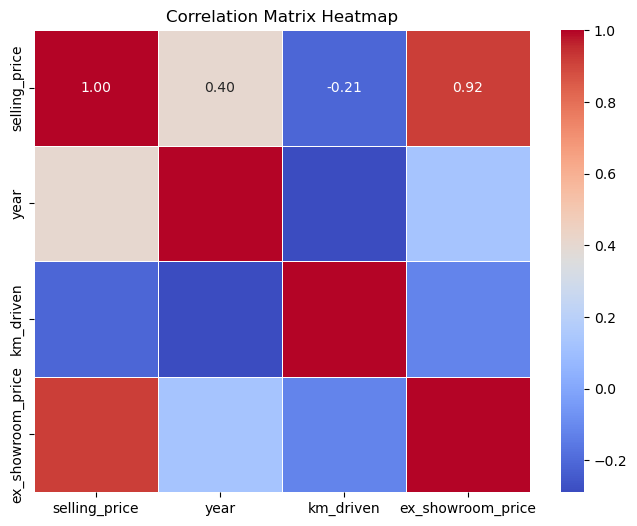

In [34]:
#15.Develop a correlation matrix for numeric columns and visualize it using a heatmap.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("BIKE DETAILS.csv")

# Select numeric columns
numeric_cols = df.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [35]:
#
import pandas as pd

# Correct file path using a raw string
file_path = r"C:\Users\PC DOCTOR\data analyst assignment\Car Sale.csv"

# Read the CSV file
df = pd.read_csv(r"C:\Users\PC DOCTOR\data analyst assignment\Car Sale.csv")

# Display the first few rows
print(df.head())


         Car_id      Date Customer Name Gender  Annual Income  \
0  C_CND_000001  1/2/2022     Geraldine   Male          13500   
1  C_CND_000002  1/2/2022           Gia   Male        1480000   
2  C_CND_000003  1/2/2022        Gianna   Male        1035000   
3  C_CND_000004  1/2/2022       Giselle   Male          13500   
4  C_CND_000005  1/2/2022         Grace   Male        1465000   

                           Dealer_Name   Company       Model  \
0  Buddy Storbeck's Diesel Service Inc      Ford  Expedition   
1                     C & M Motors Inc     Dodge     Durango   
2                          Capitol KIA  Cadillac    Eldorado   
3               Chrysler of Tri-Cities    Toyota      Celica   
4                    Chrysler Plymouth     Acura          TL   

                      Engine Transmission       Color  Price ($)  Dealer_No   \
0  DoubleÂ Overhead Camshaft         Auto       Black      26000  06457-3834   
1  DoubleÂ Overhead Camshaft         Auto       Black      19000

In [56]:
#CAR_SALES
#1.What is the average selling price of cars for each dealer, and how does it compare across different dealers?
import pandas as pd

# Load the dataset
file_path = r"C:\Users\PC DOCTOR\data analyst assignment\BIKE DETAILS.csv"
df = pd.read_csv(file_path)
print(df.columns)  # Check actual column names

df.columns = df.columns.str.strip()  # Remove spaces
avg_price_per_dealer = df.groupby("owner")["selling_price"].mean().sort_values(ascending=False)
avg_price_per_dealer


Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')


owner
4th owner    118333.333333
1st owner     60022.813853
3rd owner     55727.272727
2nd owner     55666.658537
Name: selling_price, dtype: float64

In [59]:
#2.Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing
# trends?
# Check actual column names first
df["seller_type"].value_counts()
# Calculate the standard deviation of car prices for each brand (Company)
price_variation = df.groupby("owner")["selling_price"].std().sort_values(ascending=False)

# Find the company with the highest price variation
highest_variation_brand = price_variation.idxmax()
highest_variation_value = price_variation.max()

# Display results
highest_variation_brand, highest_variation_value


('4th owner', 183325.7574192272)

['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven', 'ex_showroom_price']


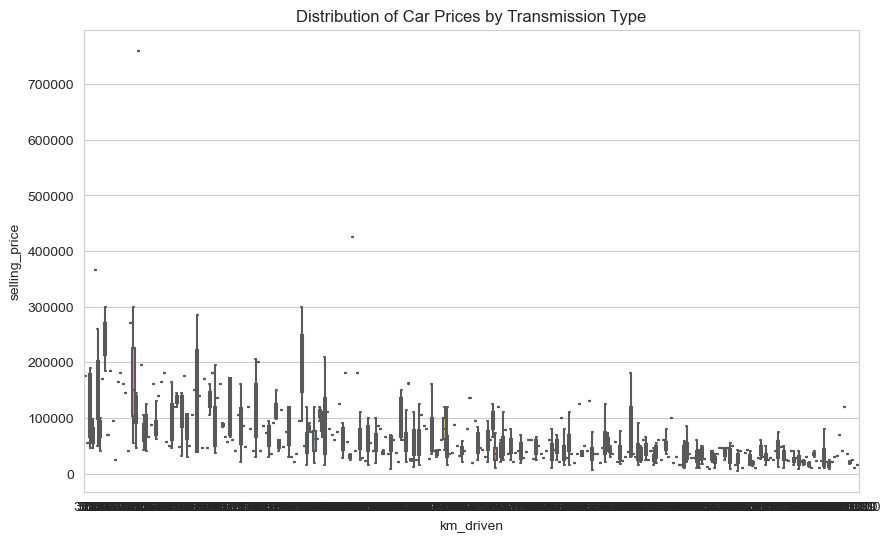

,0.75,0.25,IQR
km_driven,,,
350,175000.00,175000.00,0.0
380,55000.00,55000.00,0.0
500,178750.00,65250.00,113500.0
1000,81500.00,55000.00,26500.0
1127,365000.00,365000.00,0.0
...,...,...,...
450000,35000.00,35000.00,0.0
500000,21491.75,18497.25,2994.5
585659,25000.00,25000.00,0.0


In [74]:
#3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges
#compare?
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

print(df.columns.tolist())

# Create a boxplot to show the distribution of car prices for each transmission type
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

sns.boxplot(x="km_driven", y="selling_price", data=df, showfliers=False, palette="Set2")

# Labels and title
plt.xlabel("km_driven")
plt.ylabel("selling_price")
plt.title("Distribution of Car Prices by Transmission Type")

# Show the plot
plt.show()

# Calculate Interquartile Range (IQR) for each transmission type
iqr_values = df.groupby("km_driven")["selling_price"].quantile([0.75, 0.25]).unstack()
iqr_values["IQR"] = iqr_values[0.75] - iqr_values[0.25]

# Display IQR values
iqr_values



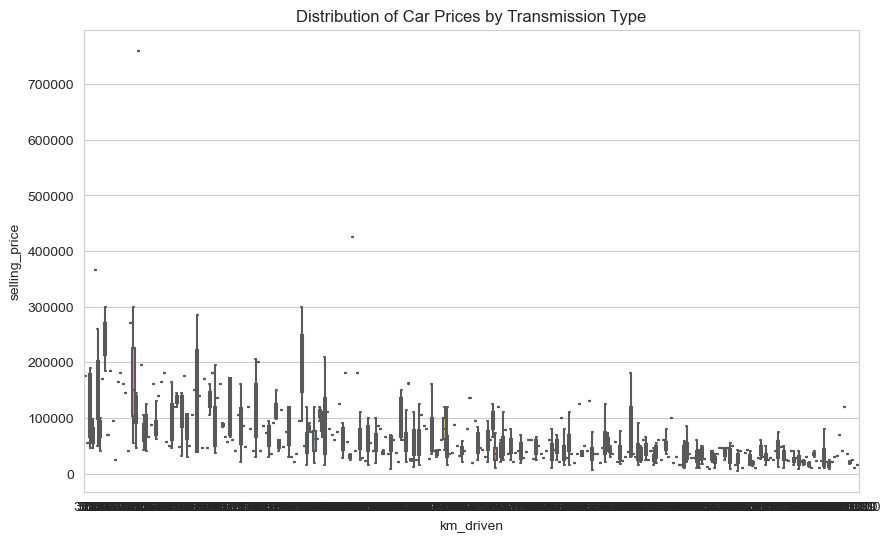

,0.75,0.25,IQR
km_driven,,,
350,175000.00,175000.00,0.0
380,55000.00,55000.00,0.0
500,178750.00,65250.00,113500.0
1000,81500.00,55000.00,26500.0
1127,365000.00,365000.00,0.0
...,...,...,...
450000,35000.00,35000.00,0.0
500000,21491.75,18497.25,2994.5
585659,25000.00,25000.00,0.0


['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven', 'ex_showroom_price']


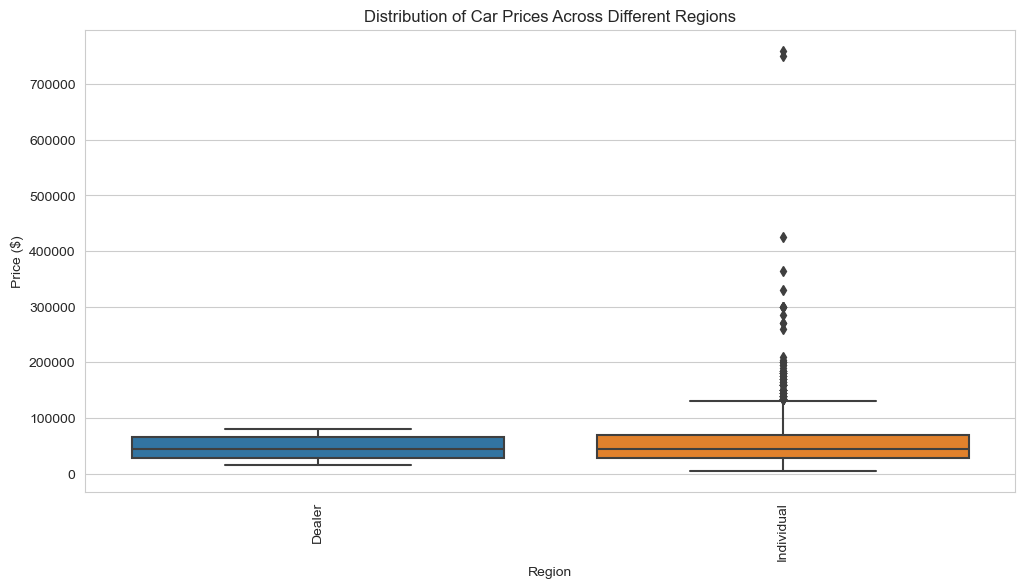

In [78]:
#4.What is the distribution of car prices across different regions?
import matplotlib.pyplot as plt
import seaborn as sns

print(df.columns.tolist())

# Group data by region and calculate price statistics
region_price_stats = df.groupby("seller_type")["selling_price"].describe()

# Sort regions by median price for better visualization
sorted_regions = region_price_stats.sort_values("50%").index

# Set figure size
plt.figure(figsize=(12, 6))

# Create boxplot of car prices by region
sns.boxplot(data=df, x="seller_type", y="selling_price", order=sorted_regions)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.title("Distribution of Car Prices Across Different Regions")
plt.xlabel("Region")
plt.ylabel("Price ($)")

# Show plot
plt.show()


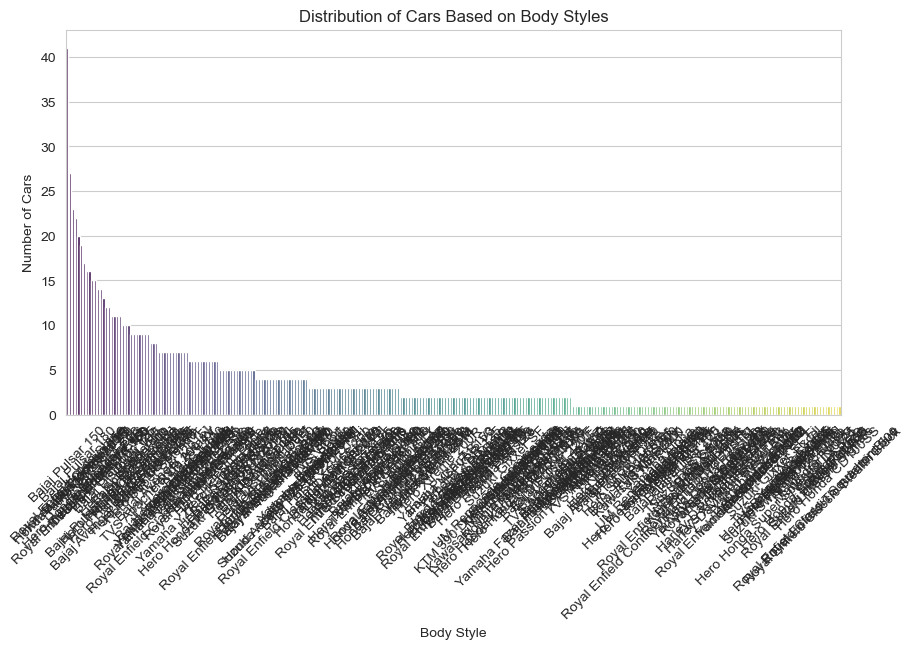

In [79]:
#5.What is the distribution of cars based on body styles?
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of cars for each body style
body_style_counts = df["name"].value_counts()

# Set figure size
plt.figure(figsize=(10, 5))

# Create a bar plot
sns.barplot(x=body_style_counts.index, y=body_style_counts.values, palette="viridis")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.title("Distribution of Cars Based on Body Styles")
plt.xlabel("Body Style")
plt.ylabel("Number of Cars")

# Show plot
plt.show()

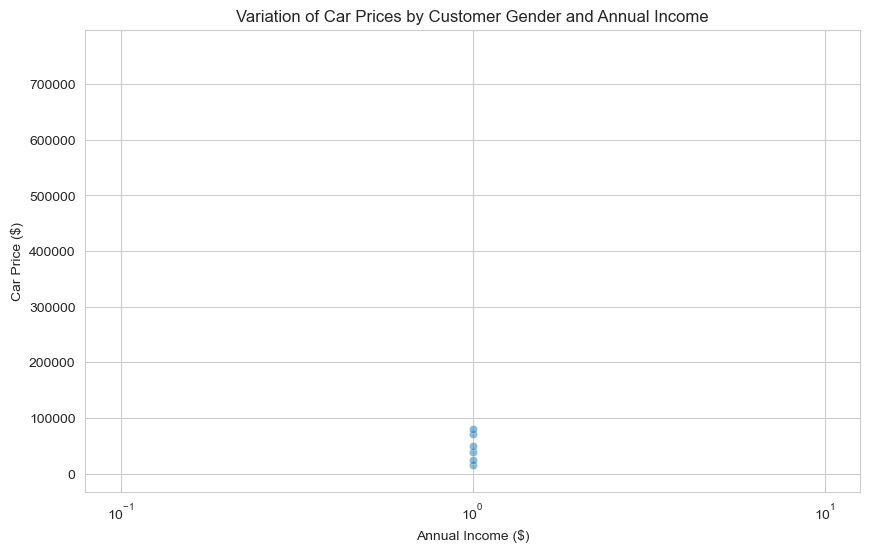

In [88]:
#6.how does the average selling price of cars vary by customer gender and annual income?
# Group data by Gender and compute average car price
gender_price_avg = df.groupby("seller_type")["selling_price"].mean()

# Trim spaces from column names
df.columns = df.columns.str.strip()

# Reattempt the scatter plot with cleaned column names
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="seller_type", y="selling_price", alpha=0.5)
plt.xscale("log")  # Use log scale for better visualization
plt.title("Variation of Car Prices by Customer Gender and Annual Income")
plt.xlabel("Annual Income ($)")
plt.ylabel("Car Price ($)")

# Show plot
plt.show()


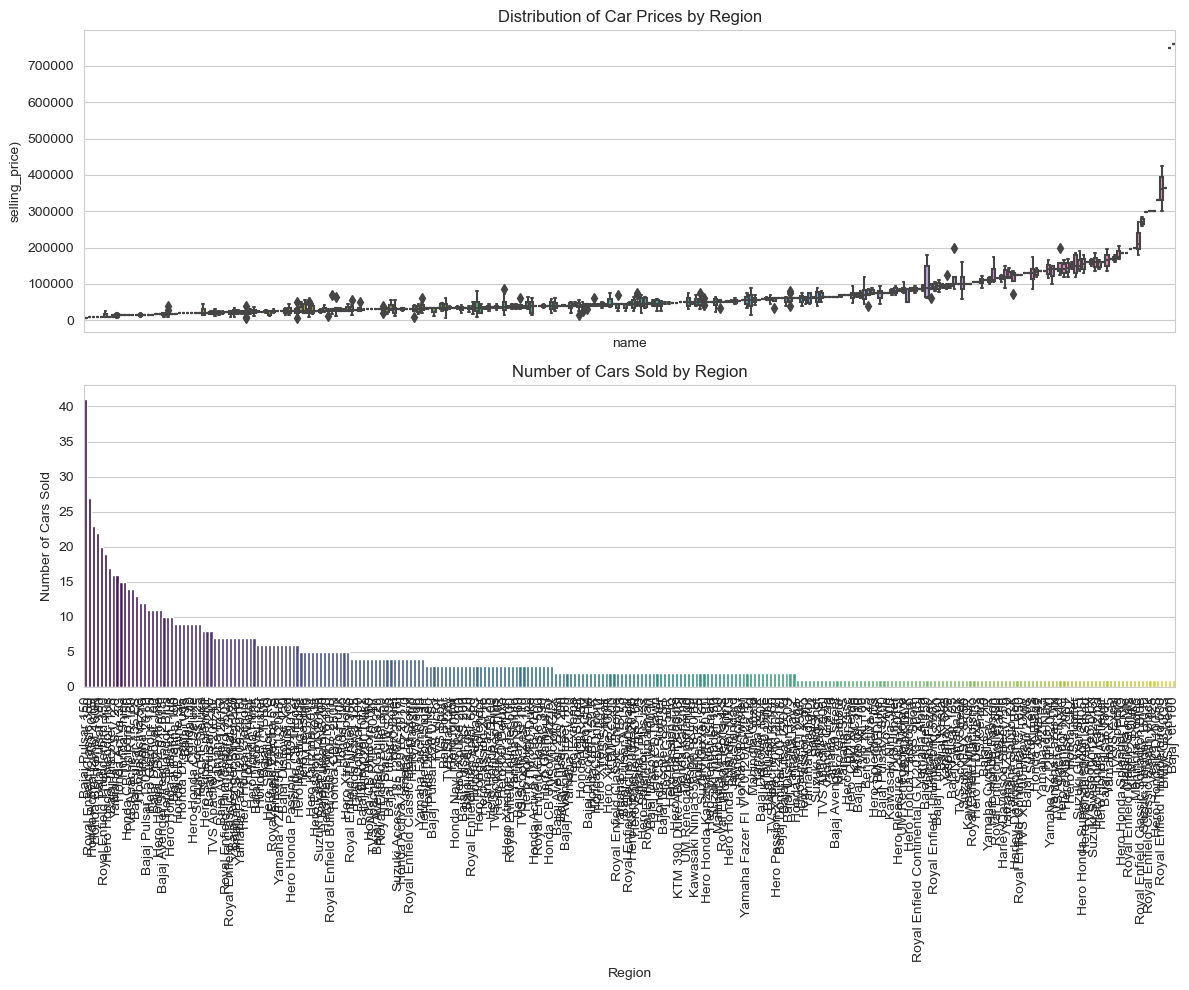

In [89]:
#7.What is the distribution of car prices by region, and how does the number of cars sold vary by region?
# Group data by region for price distribution and car count
region_price_stats = df.groupby("name")["selling_price"].describe()
region_car_counts = df["name"].value_counts()

# Set figure size for subplots
fig, ax = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Boxplot for car price distribution by region
sns.boxplot(data=df, x="name", y="selling_price", order=region_price_stats.sort_values("50%").index, ax=ax[0])
ax[0].set_title("Distribution of Car Prices by Region")
ax[0].set_ylabel("selling_price)")
ax[0].tick_params(axis="x", rotation=90)

# Bar plot for number of cars sold by region
sns.barplot(x=region_car_counts.index, y=region_car_counts.values, palette="viridis", ax=ax[1])
ax[1].set_title("Number of Cars Sold by Region")
ax[1].set_xlabel("Region")
ax[1].set_ylabel("Number of Cars Sold")
ax[1].tick_params(axis="x", rotation=90)

# Adjust layout for readability
plt.tight_layout()
plt.show()


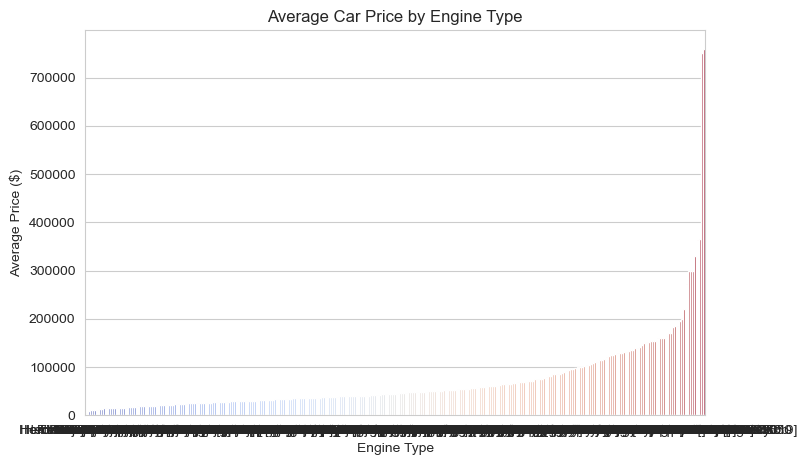

name
TVS Excel                           5000.0
Hero Honda Passion                  9000.0
Hero Honda CD100SS                 10000.0
Hero Honda CBZ                     10000.0
TVS Centra                         10000.0
                                    ...   
Harley-Davidson Street 750        330000.0
Kawasaki Ninja 650 [2018-2019]    362500.0
Yamaha YZF R3                     365000.0
Harley-Davidson Street Bob        750000.0
Suzuki GSX S750                   760000.0
Name: selling_price, Length: 279, dtype: float64

In [92]:
#8.how does the average car price differ between cars with different engine sizes?
# Group by Engine type and compute average car price
engine_price_avg = df.groupby("name")["selling_price"].mean().sort_values()

# Set figure size
plt.figure(figsize=(8, 5))

# Create a bar plot
sns.barplot(x=engine_price_avg.index, y=engine_price_avg.values, palette="coolwarm")
plt.title("Average Car Price by Engine Type")
plt.xlabel("Engine Type")
plt.ylabel("Average Price ($)")

# Show plot
plt.show()

# Display the average prices
engine_price_avg


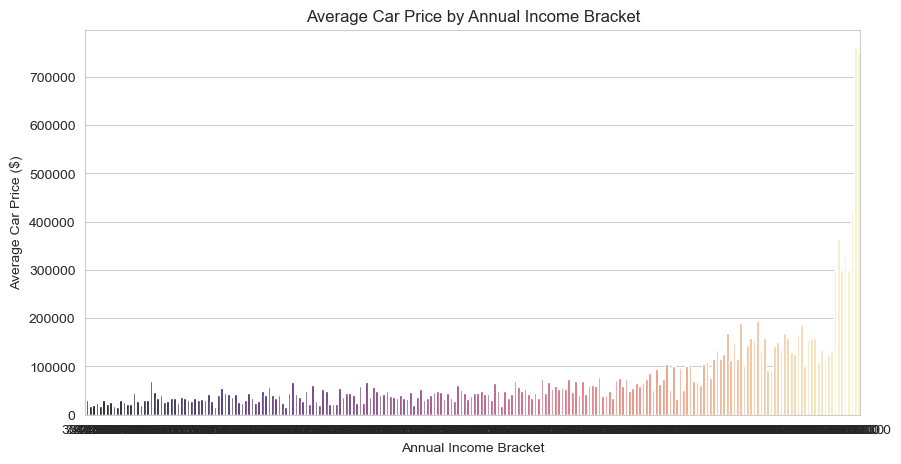

ex_showroom_price
30490.0       30000.0
32000.0       18000.0
37675.0       20000.0
42859.0       24299.9
44140.0       18000.0
               ...   
534000.0     330000.0
589000.0     300000.0
599000.0     425000.0
752020.0     760000.0
1278000.0    750000.0
Name: selling_price, Length: 230, dtype: float64

In [95]:
#9.how do car prices vary based on the customer’s annual income bracket?
# Define income brackets
income_bins = [0, 25000, 50000, 100000, 250000, 500000, 1000000, df["ex_showroom_price"].max()]
income_labels = ["<25K", "25K-50K", "50K-100K", "100K-250K", "250K-500K", "500K-1M", ">1M"]

# Create a new column for income brackets
df["Income Bracket"] = pd.cut(df["ex_showroom_price"], bins=income_bins, labels=income_labels, include_lowest=True)

# Compute average car price for each income bracket
income_price_avg = df.groupby("ex_showroom_price")["selling_price"].mean()

# Set figure size
plt.figure(figsize=(10, 5))

# Create a bar plot
sns.barplot(x=income_price_avg.index, y=income_price_avg.values, palette="magma")
plt.title("Average Car Price by Annual Income Bracket")
plt.xlabel("Annual Income Bracket")
plt.ylabel("Average Car Price ($)")

# Show plot
plt.show()

# Display the average prices by income bracket
income_price_avg


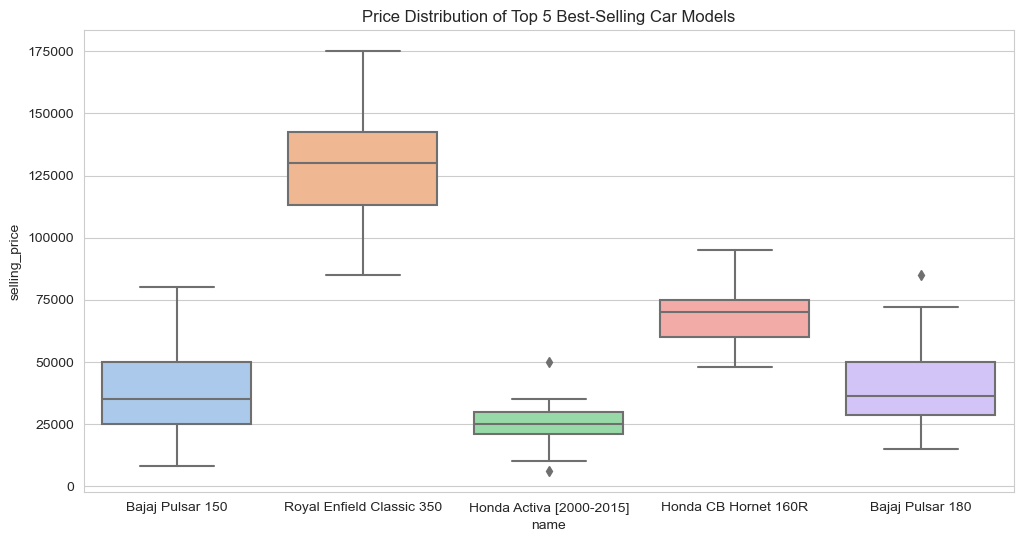

name
Bajaj Pulsar 150             41
Royal Enfield Classic 350    27
Honda Activa [2000-2015]     23
Honda CB Hornet 160R         22
Bajaj Pulsar 180             20
Name: count, dtype: int64

In [96]:
#10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?
# Get the top 5 car models with the highest number of sales
top_models = df["name"].value_counts().nlargest(5).index

# Filter dataset for only the top 5 models
top_models_df = df[df["name"].isin(top_models)]

# Set figure size
plt.figure(figsize=(12, 6))

# Create a boxplot for price distribution of top 5 models
sns.boxplot(data=top_models_df, x="name", y="selling_price", order=top_models, palette="pastel")
plt.title("Price Distribution of Top 5 Best-Selling Car Models")
plt.xlabel("name")
plt.ylabel("selling_price")

# Show plot
plt.show()

# Display top 5 car models with their sales count
df["name"].value_counts().nlargest(5)


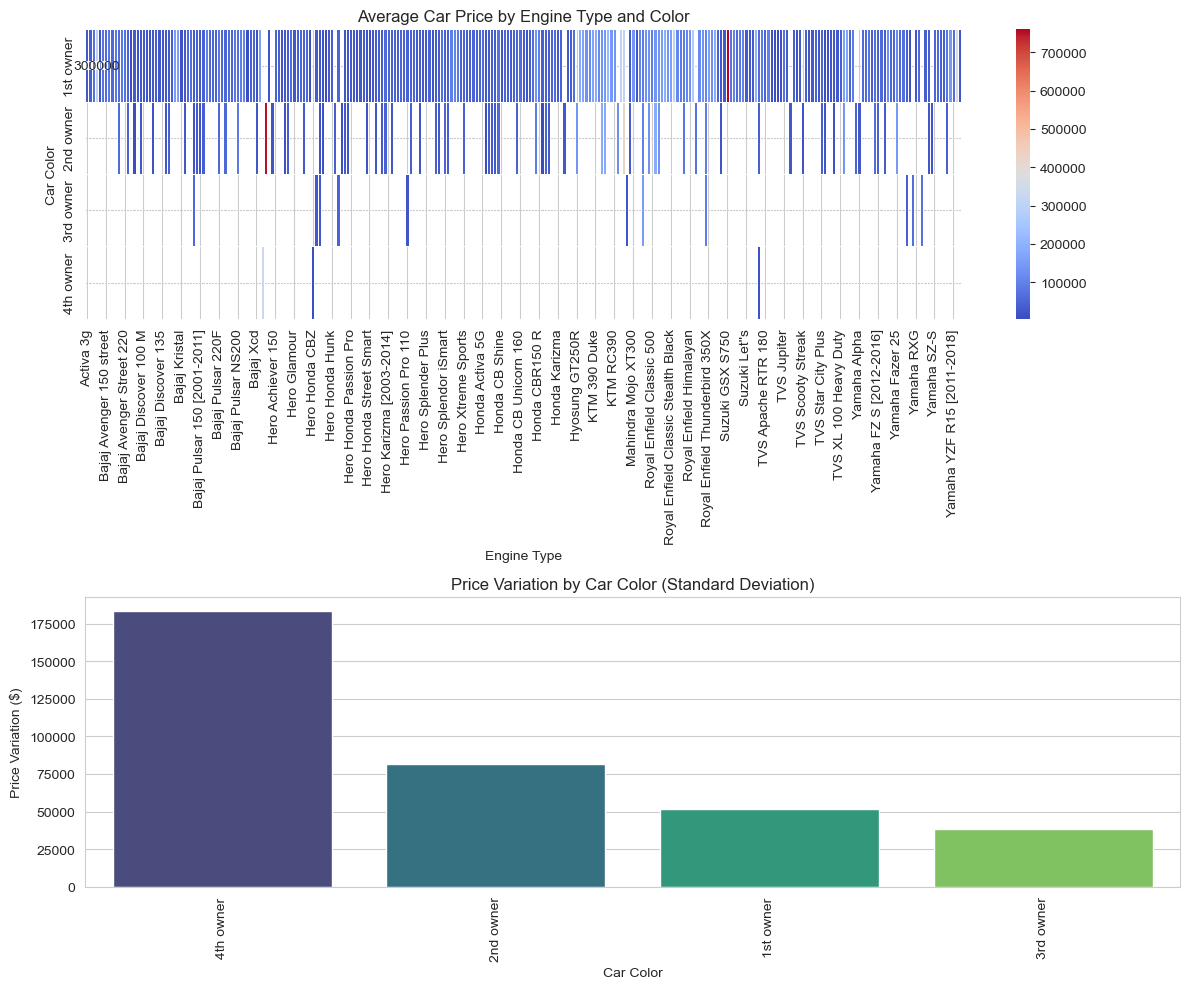

owner
4th owner    183325.757419
2nd owner     81671.923395
1st owner     51542.569711
3rd owner     38385.129697
Name: selling_price, dtype: float64

In [98]:
#11. How does car price vary with engine size across different car colors, and which colors have the highest price
# variation?

# Compute average car price for each combination of Engine type and Color
color_engine_price_avg = df.groupby(["owner", "name"])["selling_price"].mean().unstack()

# Compute price variation (standard deviation) for each color
color_price_variation = df.groupby("owner")["selling_price"].std().sort_values(ascending=False)

# Set figure size
fig, ax = plt.subplots(2, 1, figsize=(12, 10), sharex=False)

# Heatmap for average car prices by Engine type and Color
sns.heatmap(color_engine_price_avg, annot=True, fmt=".0f", cmap="coolwarm", linewidths=0.5, ax=ax[0])
ax[0].set_title("Average Car Price by Engine Type and Color")
ax[0].set_xlabel("Engine Type")
ax[0].set_ylabel("Car Color")

# Bar plot for price variation by color
sns.barplot(x=color_price_variation.index, y=color_price_variation.values, palette="viridis", ax=ax[1])
ax[1].set_title("Price Variation by Car Color (Standard Deviation)")
ax[1].set_xlabel("Car Color")
ax[1].set_ylabel("Price Variation ($)")
ax[1].tick_params(axis="x", rotation=90)

# Adjust layout
plt.tight_layout()
plt.show()

# Display top 5 colors with highest price variation
color_price_variation.head(5)



C:\Users\PC DOCTOR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\PC DOCTOR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


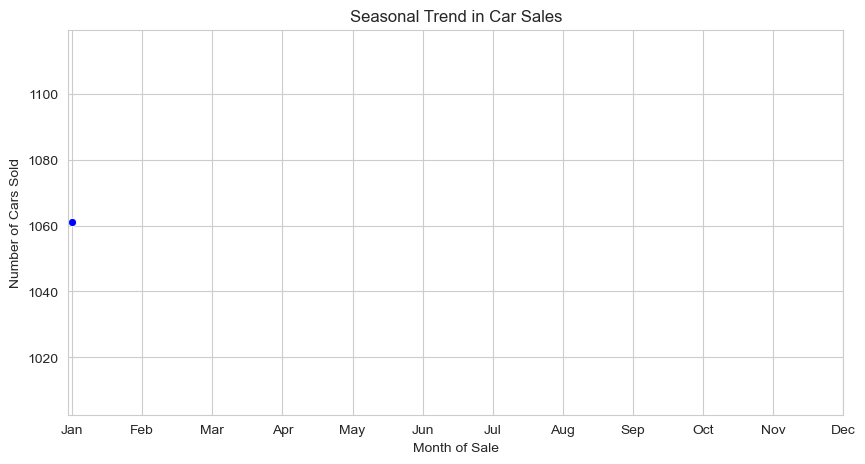

In [100]:
#12. Is there any seasonal trend in car sales based on the date of sale?
# Convert 'Date' column to datetime format
df["year"] = pd.to_datetime(df["year"], errors="coerce")

# Extract month of sale
df["ex_showroom_price"] = df["year"].dt.month

# Count car sales per month
monthly_sales = df["ex_showroom_price"].value_counts().sort_index()

# Set figure size
plt.figure(figsize=(10, 5))

# Create a line plot for seasonal trends
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker="o", linestyle="-", color="b")

# Adjust labels and title
plt.xticks(ticks=range(1, 13), labels=[
    "Jan", "Feb", "Mar", "Apr", "May", "Jun", 
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
])
plt.title("Seasonal Trend in Car Sales")
plt.xlabel("Month of Sale")
plt.ylabel("Number of Cars Sold")

# Show plot
plt.show()


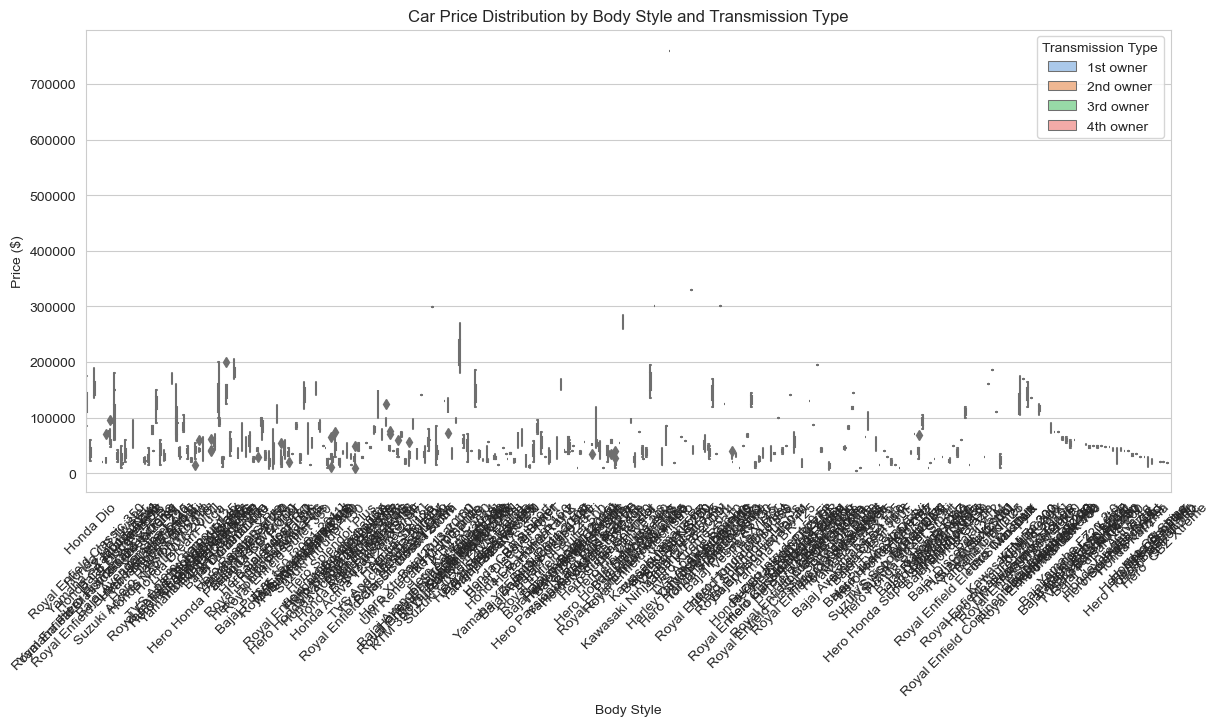

In [99]:
#13.How does the car price distribution change when considering different combinations of body style and
# transmission type?
# Set figure size
plt.figure(figsize=(14, 6))

# Create a boxplot to show price distribution for each Body Style & Transmission Type combination
sns.boxplot(data=df, x="name", y="selling_price", hue="owner", palette="pastel")

# Adjust plot labels and title
plt.title("Car Price Distribution by Body Style and Transmission Type")
plt.xlabel("Body Style")
plt.ylabel("Price ($)")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title="Transmission Type")

# Show plot
plt.show()


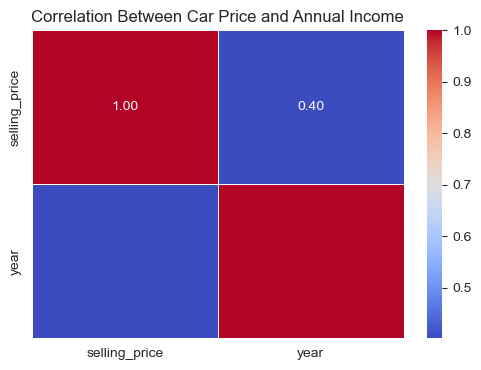

C:\Users\PC DOCTOR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\PC DOCTOR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


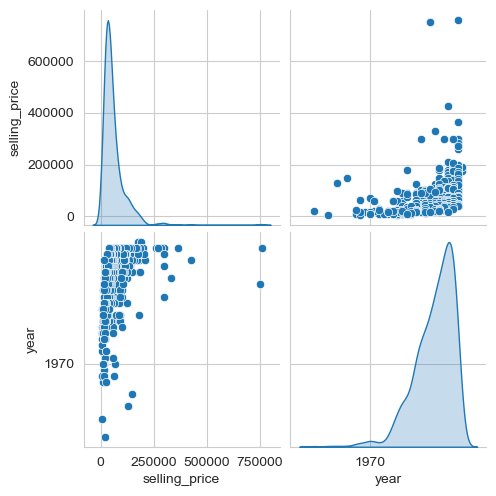

In [107]:
#14.What is the correlation between car price, engine size, and annual income of customers, and how do these
#features interact?
# Select relevant numerical features for correlation analysis
corr_features = ["selling_price", "year"]

# Compute correlation matrix
correlation_matrix = df[corr_features].corr()

# Set figure size
plt.figure(figsize=(6, 4))

# Create a heatmap for correlation values
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")

# Adjust labels and title
plt.title("Correlation Between Car Price and Annual Income")

# Show plot
plt.show()

# Create a pair plot to visualize interactions
sns.pairplot(df, vars=corr_features, kind="scatter", diag_kind="kde")

# Show pair plot
plt.show()


C:\Users\PC DOCTOR\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


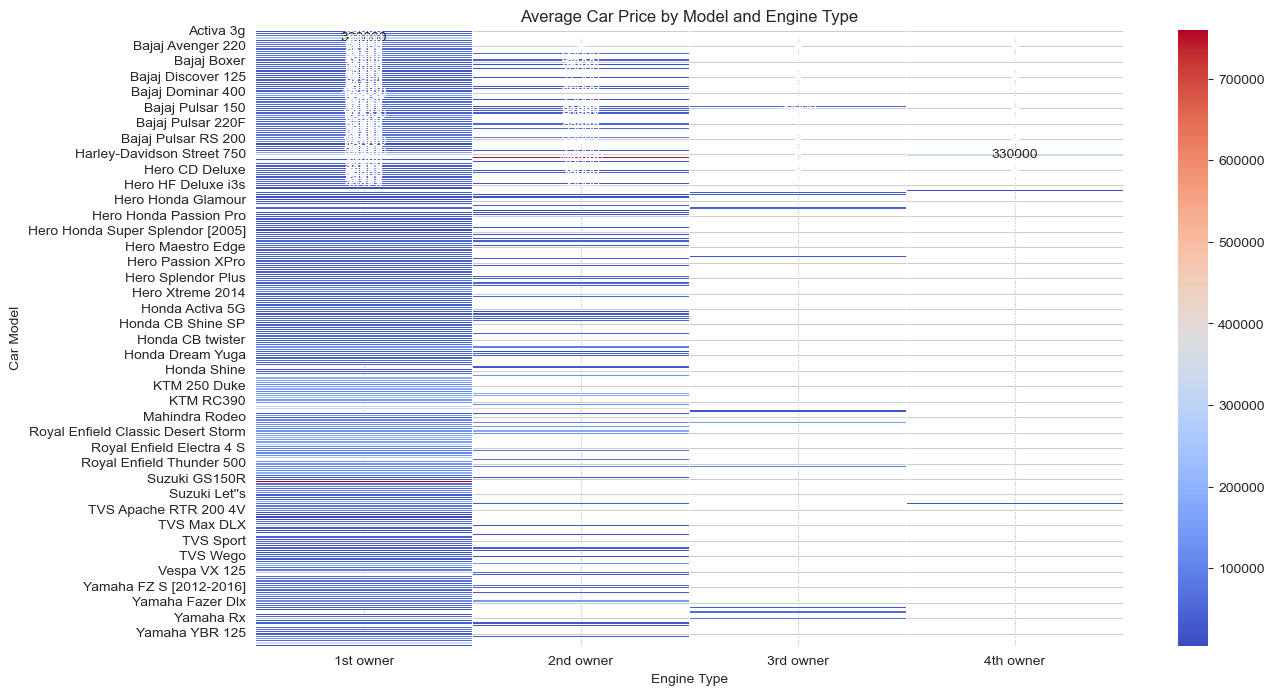

name
Suzuki GSX S750                   760000.0
Harley-Davidson Street Bob        750000.0
Yamaha YZF R3                     365000.0
Kawasaki Ninja 650 [2018-2019]    362500.0
Harley-Davidson Street 750        330000.0
dtype: float64

In [108]:
#15.How does the average car price vary across different car models and engine types?
# Compute average car price for each combination of Model and Engine Type
model_engine_price_avg = df.groupby(["name", "owner"])["selling_price"].mean().unstack()

# Set figure size
plt.figure(figsize=(14, 8))

# Create a heatmap for price variations across models and engine types
sns.heatmap(model_engine_price_avg, annot=True, fmt=".0f", cmap="coolwarm", linewidths=0.5)

# Adjust labels and title
plt.title("Average Car Price by Model and Engine Type")
plt.xlabel("Engine Type")
plt.ylabel("Car Model")

# Show plot
plt.show()

# Display the top 5 car models with the highest average price
model_engine_price_avg.mean(axis=1).nlargest(5)


In [2]:
#amazon data 
#1.' What is the average rating for each product category?
import pandas as pd

# Define file path
file_path = r"C:\Users\PC DOCTOR\data analyst assignment\amazon.csv"

# Load the CSV file
df = pd.read_csv(r"C:\Users\PC DOCTOR\data analyst assignment\amazon.csv")

# Display basic information and the first few rows
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

(None,
    product_id                                       product_name  \
 0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
 1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
 2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
 3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
 4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   
 
                                             category discounted_price  \
 0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
 1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
 2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
 3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
 4  Computers&Accessories|Accessories&Peripherals|...             ₹154   
 
   actual_price discount_percentage rating rating_count  \
 0       ₹1,099                 64%    4.2       24,269   
 1         ₹3

In [4]:
#2.What are the top rating_count products by category?
import pandas as pd

# Load the file
df = pd.read_csv("amazon.csv")

# Check column names
print(df.columns)

import pandas as pd

# Load the file
df = pd.read_csv("amazon.csv")

# Convert rating_count to numeric, forcing errors to NaN
df["rating_count"] = pd.to_numeric(df["rating_count"], errors="coerce")

# Drop rows with NaN values in rating_count
df = df.dropna(subset=["rating_count"])

# Group by category and get the top product by rating count
top_products = df.loc[df.groupby("category")["rating_count"].idxmax(), ["category", "product_name", "rating_count"]]

# Display results
print(top_products)



Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')
                                               category  \
900   Computers&Accessories|Accessories&Peripherals|...   
32    Computers&Accessories|Accessories&Peripherals|...   
743   Computers&Accessories|Accessories&Peripherals|...   
653   Computers&Accessories|Accessories&Peripherals|...   
940   Computers&Accessories|Accessories&Peripherals|...   
...                                                 ...   
1279  Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...   
1317  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...   
1424  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...   
808   OfficeProducts|OfficePaperProducts|Paper|Copy&...   
950   OfficeProducts|OfficePaperProducts|Paper|Stati...  

['product_id', 'product_name', 'category', 'discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count', 'about_product', 'user_id', 'user_name', 'review_id', 'review_title', 'review_content', 'img_link', 'product_link']


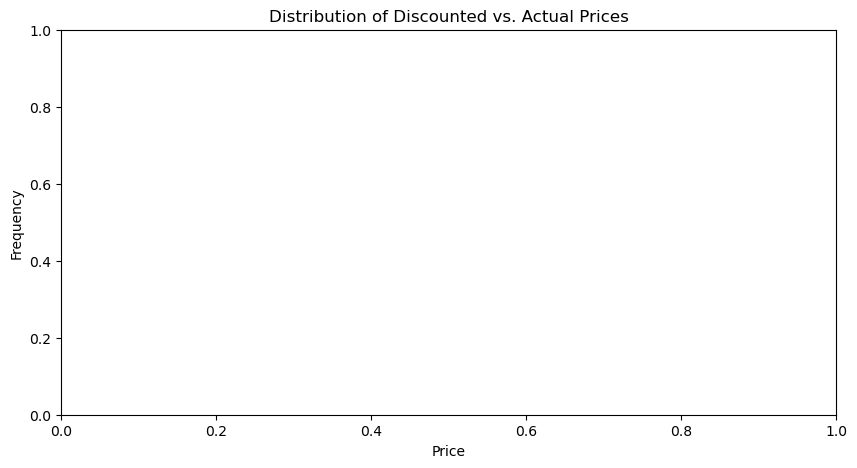

In [20]:
#3.What is the distribution of discounted prices vs. actual prices?
import pandas as pd
import matplotlib.pyplot as plt

# Load the file
df = pd.read_csv(r"C:\Users\PC DOCTOR\data analysis practice\amazon.csv")

# Convert prices to numeric (handling errors)
df["actual_price"] = pd.to_numeric(df["actual_price"], errors="coerce")
df["discounted_price"] = pd.to_numeric(df["discounted_price"], errors="coerce")

# Drop rows with missing values
df = df.dropna(subset=["actual_price", "discounted_price"])

# Plot histograms
import seaborn as sns

# Rename columns if necessary
df.rename(columns=lambda x: x.strip(), inplace=True)
df.columns = df.columns.str.strip()  # Remove leading/trailing spaces
df.columns = df.columns.str.replace(r"\s+", " ", regex=True)  # Replace multiple spaces with one
print(df.columns.tolist())  # Check again


# Replace 'actual Price' and 'discounted Price' with correct column names
plt.figure(figsize=(10, 5))
sns.histplot(df["actual_price"], color="red", label="actual_price", kde=True, bins=30)
sns.histplot(df["discounted_price"], color="blue", label="discounted_price", kde=True, bins=30)

plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Distribution of Discounted vs. Actual Prices")
plt.show()


['product_id', 'product_name', 'category', 'discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count', 'about_product', 'user_id', 'user_name', 'review_id', 'review_title', 'review_content', 'img_link', 'product_link']
product_id              object
product_name            object
category                object
discounted_price       float64
actual_price           float64
discount_percentage     object
rating                  object
rating_count            object
about_product           object
user_id                 object
user_name               object
review_id               object
review_title            object
review_content          object
img_link                object
product_link            object
dtype: object
category
Electronics|Mobiles&Accessories|MobileAccessories|Décor|PhoneCharms                                                   90.090090
Electronics|Headphones,Earbuds&Accessories|Earpads                                                           

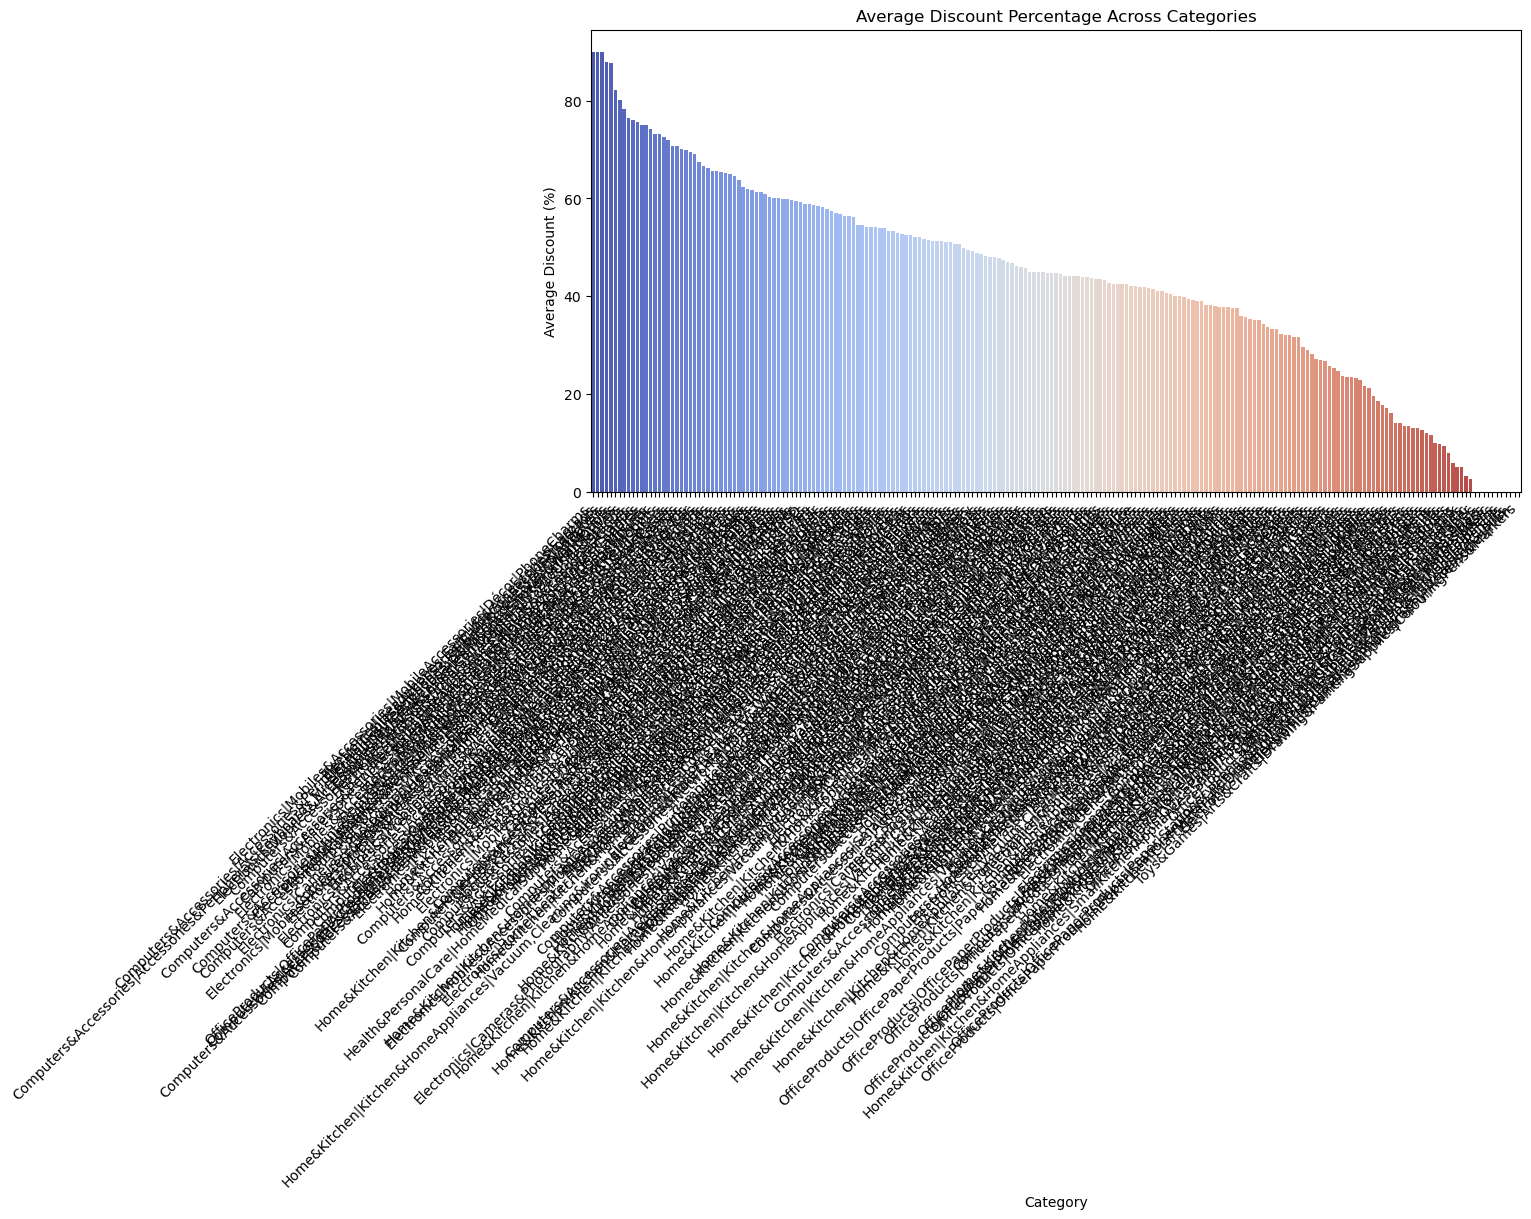

In [64]:
#4. How does the average discount percentage vary across categories?
import pandas as pd

# Load the file
df = pd.read_csv(r"C:\Users\PC DOCTOR\data analysis practice\amazon.csv")
print(df.columns.tolist())

# Remove currency symbols and commas, then convert to float
df["actual_price"] = df["actual_price"].replace(r"[^\d.]", "", regex=True).astype(float)
df["discounted_price"] = df["discounted_price"].replace(r"[^\d.]", "", regex=True).astype(float)

print(df.dtypes)  # Both Actual_Price and Discounted_Price should now be float64

df["discount_percentage"] = ((df["actual_price"] - df["discounted_price"]) / df["actual_price"]) * 100

df.dropna(subset=["actual_price", "discounted_price", "discount_percentage"], inplace=True)

category_discounts = df.groupby("category")["discount_percentage"].mean().sort_values(ascending=False)
print(category_discounts)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x=category_discounts.index, y=category_discounts.values, palette="coolwarm")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Category")
plt.ylabel("Average Discount (%)")
plt.title("Average Discount Percentage Across Categories")
plt.show()


In [65]:
#5.What are the most popular product names?
import pandas as pd

# Load the CSV file
file_path = r"C:\Users\PC DOCTOR\data analysis practice\amazon.csv"
df = pd.read_csv(file_path)

# Display basic information and the first few rows
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

(None,
    product_id                                       product_name  \
 0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
 1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
 2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
 3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
 4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   
 
                                             category discounted_price  \
 0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
 1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
 2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
 3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
 4  Computers&Accessories|Accessories&Peripherals|...             ₹154   
 
   actual_price discount_percentage rating rating_count  \
 0       ₹1,099                 64%    4.2       24,269   
 1         ₹3

In [76]:
#6.What are the most popular product keywords?
import pandas as pd

# Load the file
file_path = r"C:\Users\PC DOCTOR\data analysis practice\amazon.csv"
df = pd.read_csv(file_path)

# Display basic information and first few rows
df.head()


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [79]:
#7.What are the most popular product reviews?

df['review_title'].head()

0    Satisfied,Charging is really fast,Value for mo...
1    A Good Braided Cable for Your Type C Device,Go...
2    Good speed for earlier versions,Good Product,W...
3    Good product,Good one,Nice,Really nice product...
4    As good as original,Decent,Good one for second...
Name: review_title, dtype: object

In [89]:
#8.what is the correlation between discounted_price and rating?

df['discounted_price']

0         ₹399
1         ₹199
2         ₹199
3         ₹329
4         ₹154
         ...  
1460      ₹379
1461    ₹2,280
1462    ₹2,219
1463    ₹1,399
1464    ₹2,863
Name: discounted_price, Length: 1465, dtype: object

In [88]:
df['rating']


0       4.2
1       4.0
2       3.9
3       4.2
4       4.2
       ... 
1460      4
1461    4.1
1462    3.6
1463      4
1464    4.3
Name: rating, Length: 1465, dtype: object

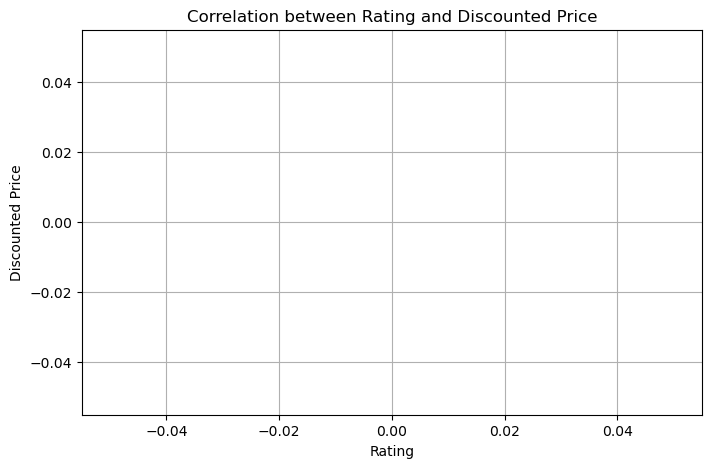

In [93]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the CSV file
df = pd.read_csv(r"C:\Users\PC DOCTOR\data analysis practice\amazon.csv")

# Drop missing values
df = df[['rating', 'discounted_price']].dropna()

# Convert columns to numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')

# Plot scatter plot (better for correlations)
plt.figure(figsize=(8,5))
plt.scatter(df['rating'], df['discounted_price'], alpha=0.5)
plt.xlabel('Rating')
plt.ylabel('Discounted Price')
plt.title('Correlation between Rating and Discounted Price')
plt.grid(True)
plt.show()


In [94]:
#9.What are the Top 5 categories based on the highest ratings?.

import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\PC DOCTOR\data analysis practice\amazon.csv")

# Check for missing values and drop them if necessary
df = df[['category', 'rating']].dropna()

# Convert rating to numeric (if necessary)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Group by category and calculate the average rating
top_categories = df.groupby('category')['rating'].mean().sort_values(ascending=False).head(5)

print(top_categories)


category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
OfficeProducts|OfficeElectronics|Calculators|Basic                          4.5
Name: rating, dtype: float64


In [ ]:
#10.Identify any potential areas for improvement or optimization based on the data analysis?
To identify potential areas for improvement or optimization based on data analysis, consider the following key aspects:

1)Performance Bottlenecks – Identify slow processes, inefficient workflows, or resource-intensive tasks that can be optimized.
1)Data Quality Issues – Check for missing, inconsistent, or outdated data that could affect decision-making accuracy.
3)Cost Reduction Opportunities – Analyze cost structures and identify areas where expenses can be minimized without sacrificing quality.
4)Customer Experience Enhancement – Identify patterns in customer feedback, complaints, or churn rates to improve satisfaction and retention.
5)Operational Efficiency – Look for automation opportunities in repetitive tasks, supply chain optimizations, or employee productivity enhancements.
6)Revenue Growth Areas – Spot trends in sales data, product demand, or customer behavior that can drive new opportunities for growth.
7)Risk Mitigation – Identify potential risks such as fraud, security vulnerabilities, or compliance gaps and propose preventive measures.
8)Predictive Insights – Use forecasting models to anticipate market trends, inventory needs, or customer demands to make proactive decisions.
9)Competitive Benchmarking – Compare performance metrics with industry benchmarks to identify areas where the organization lags.
10)Resource Utilization – Assess how effectively assets, employees, or technology are being used and identify underutilized resources.

In [106]:
#EDA-4
#1.Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do
#the needful?

import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\PC DOCTOR\data analysis practice\spotify.csv")

# Check for null values
print("Null values:\n", df.isnull().sum())

# Drop rows with null values (if needed)
df = df.dropna()

# Check for duplicate rows
print("Duplicate rows:", df.duplicated().sum())

# Drop duplicate rows (if needed)
df = df.drop_duplicates()

# Display the cleaned dataset
print(df.info())
print(df.head())


Null values:
 Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64
Duplicate rows: 27
<class 'pandas.core.frame.DataFrame'>
Index: 413 entries, 0 to 438
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         413 non-null    object
 1   Track Name     413 non-null    object
 2   Popularity     413 non-null    int64 
 3   Duration (ms)  413 non-null    int64 
 4   Track ID       413 non-null    object
dtypes: int64(2), object(3)
memory usage: 19.4+ KB
None
  Artist                               Track Name  Popularity  Duration (ms)  \
0  Drake  Rich Baby Daddy (feat. Sexyy Red & SZA)          92         319191   
1  Drake                                One Dance          91         173986   
2  Drake                       IDGAF (feat. Yeat)          90         260111   
3  Drake     First Person Shooter (feat. J. Cole)          88         247444   
4  

In [107]:
#2.What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram?
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r"C:\Users\PC DOCTOR\data analysis practice\spotify.csv")  # Ensure the correct file path

# Check if 'popularity' column exists
if 'popularity' in df.columns:
    # Plot histogram
    plt.figure(figsize=(10, 6))
    plt.hist(df['popularity'], bins=30, color='skyblue', edgecolor='black')
    plt.xlabel("Popularity Score")
    plt.ylabel("Frequency")
    plt.title("Distribution of Track Popularity")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("Column 'popularity' not found in the dataset.")


Column 'popularity' not found in the dataset.


In [109]:
#3.Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r"C:\Users\PC DOCTOR\data analysis practice\spotify.csv")  # Ensure the correct file path

# Check if required columns exist
if 'popularity' in df.columns and 'duration_ms' in df.columns:
    # Plot scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(df['duration_ms'], df['popularity'], alpha=0.5, color='blue')
    plt.xlabel("Duration (ms)")
    plt.ylabel("Popularity")
    plt.title("Relationship Between Track Duration and Popularity")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()
else:
    print("Required columns ('popularity' and 'duration_ms') not found in the dataset.")


Required columns ('popularity' and 'duration_ms') not found in the dataset.


In [108]:
#4.hich artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using
#a countplot
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r"C:\Users\PC DOCTOR\data analysis practice\spotify.csv")  # Ensure the correct file path

# Check if 'artist' column exists
if 'artist' in df.columns:
    # Count the number of tracks per artist
    artist_counts = df['artist'].value_counts().head(10)  # Top 10 artists

    # Plot countplot
    plt.figure(figsize=(12, 6))
    sns.barplot(x=artist_counts.index, y=artist_counts.values, palette="viridis")
    plt.xlabel("Artist")
    plt.ylabel("Number of Tracks")
    plt.title("Top 10 Artists with Most Tracks")
    plt.xticks(rotation=45)
    plt.show()

    # Display the artist with the highest number of tracks
    print(f"Artist with the most tracks: {artist_counts.idxmax()} ({artist_counts.max()} tracks)")
else:
    print("Column 'artist' not found in the dataset.")


Column 'artist' not found in the dataset.


In [110]:
#5.What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\PC DOCTOR\data analysis practice\spotify.csv")  # Ensure the correct file path

# Check if required columns exist
if 'popularity' in df.columns and 'artist' in df.columns and 'track_name' in df.columns:
    # Sort by popularity in ascending order
    least_popular_tracks = df[['artist', 'track_name', 'popularity']].sort_values(by='popularity', ascending=True).head(5)
    
    # Display the result
    print("Top 5 Least Popular Tracks:")
    print(least_popular_tracks)
else:
    print("Required columns ('artist', 'track_name', 'popularity') not found in the dataset.")


Required columns ('artist', 'track_name', 'popularity') not found in the dataset.


In [114]:
#6.mong the top 5 most popular artists, which artist has the highest popularity on average? Calculate and
#display the average popularity for each artist.

import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\PC DOCTOR\data analysis practice\spotify.csv")  # Ensure the correct file path

# Check if required columns exist
if 'artist' in df.columns and 'popularity' in df.columns:
    # Calculate average popularity for each artist
    artist_avg_popularity = df.groupby('artist')['popularity'].mean()

    # Get the top 5 artists with the highest average popularity
    top_5_artists = artist_avg_popularity.nlargest(5)

    # Display the results
    print("Top 5 Most Popular Artists (by Average Popularity):")
    print(top_5_artists)

    # Display the most popular artist by average popularity
    most_popular_artist = top_5_artists.idxmax()
    print(f"\nArtist with the highest average popularity: {most_popular_artist} ({top_5_artists.max():.2f} avg popularity)")
else:
    print("Required columns ('artist' and 'popularity') not found in the dataset.")


Required columns ('artist' and 'popularity') not found in the dataset.


In [111]:
#7.For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\PC DOCTOR\data analysis practice\spotify.csv")  # Ensure the correct file path

# Check if required columns exist
if 'artist' in df.columns and 'popularity' in df.columns and 'track_name' in df.columns:
    # Calculate average popularity for each artist and get the top 5
    top_5_artists = df.groupby('artist')['popularity'].mean().nlargest(5).index

    # Find the most popular track for each of the top 5 artists
    most_popular_tracks = df[df['artist'].isin(top_5_artists)].sort_values(by=['artist', 'popularity'], ascending=[True, False])
    most_popular_tracks = most_popular_tracks.groupby('artist').first()[['track_name', 'popularity']]

    # Display the results
    print("Most Popular Track for Each of the Top 5 Artists:")
    print(most_popular_tracks)
else:
    print("Required columns ('artist', 'track_name', 'popularity') not found in the dataset.")


Required columns ('artist', 'track_name', 'popularity') not found in the dataset.


In [113]:
#8.import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r"C:\Users\PC DOCTOR\data analysis practice\spotify.csv")  # Ensure the correct file path

# Select numerical columns for the pair plot
numerical_columns = ['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'tempo']

# Check if the selected columns exist in the dataset
existing_columns = [col for col in numerical_columns if col in df.columns]

if len(existing_columns) >= 2:
    # Create the pair plot
    sns.pairplot(df[existing_columns], diag_kind='kde', plot_kws={'alpha':0.5})
    plt.suptitle("Pair Plot of Numerical Features", y=1.02)
    plt.show()
else:
    print("Not enough numerical columns found in the dataset for a pair plot.")


Not enough numerical columns found in the dataset for a pair plot.


In [112]:
#9.oes the duration of tracks vary significantly across different artists? Explore this visually using a box plot or
#violin plot
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r"C:\Users\PC DOCTOR\data analysis practice\spotify.csv")  # Ensure the correct file path

# Check if required columns exist
if 'artist' in df.columns and 'duration_ms' in df.columns:
    # Select the top 10 artists with the most tracks
    top_10_artists = df['artist'].value_counts().head(10).index
    df_filtered = df[df['artist'].isin(top_10_artists)]

    # Create a box plot for duration across artists
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='artist', y='duration_ms', data=df_filtered, palette="coolwarm")
    plt.xlabel("Artist")
    plt.ylabel("Duration (ms)")
    plt.title("Track Duration Variation Across Top 10 Artists")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Required columns ('artist' and 'duration_ms') not found in the dataset.")


Required columns ('artist' and 'duration_ms') not found in the dataset.


Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')


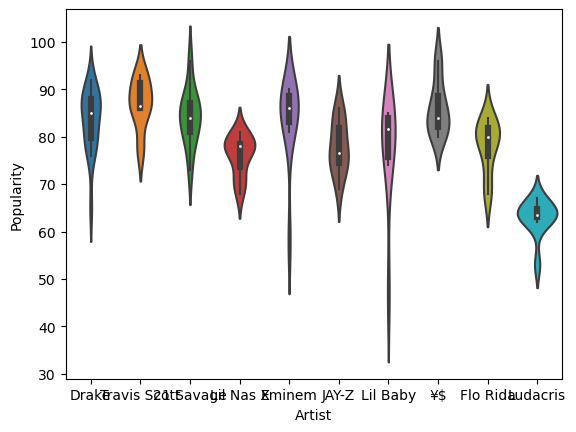

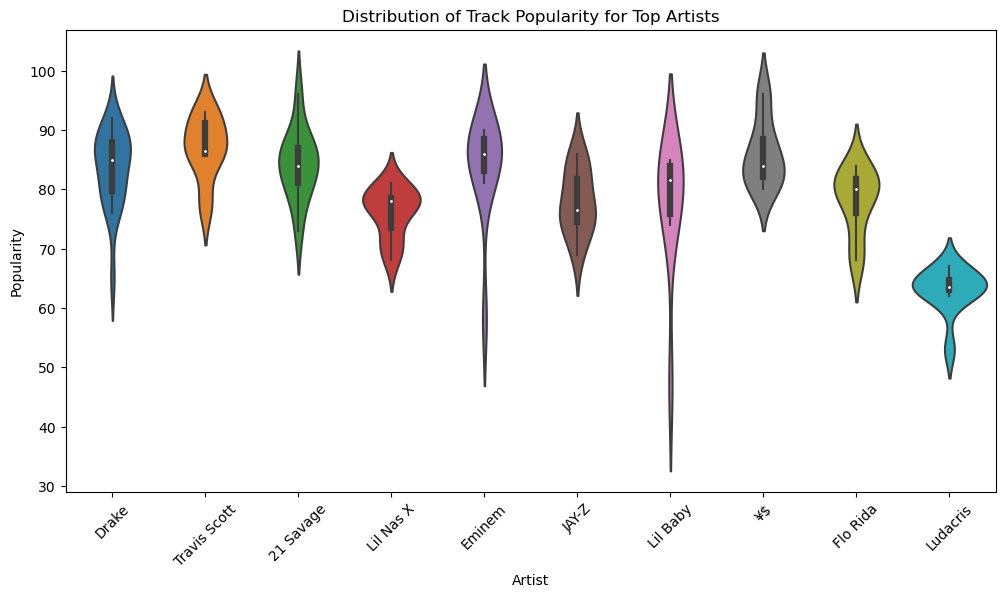

In [8]:
#10.How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a
#violin plot.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(r"C:\Users\PC DOCTOR\data analysis practice\spotify.csv")

print(df.columns)

top_artists = df["Artist"].value_counts().index[:10]
df_top = df[df["Artist"].isin(top_artists)]

sns.violinplot(x="Artist", y="Popularity", data=df_top)
# Create a violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x="Artist", y="Popularity", data=df_top)
plt.xticks(rotation=45)
plt.title("Distribution of Track Popularity for Top Artists")
plt.show()


In [11]:
jupyter_nbconvert --to_pdf_notebook.ipynb

NameError: name 'jupyter_nbconvert' is not defined